# import needed libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load data

In [3]:
df=pd.read_csv('titanic (3).csv')


In [83]:
df.head(100)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,0.0,2,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.55,0.0,11,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.55,0.0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.55,0.0,0,135
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.55,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,"Dodge, Mrs. Washington (Ruth Vidaver)",1,54.0000,1,1,33638,81.8583,0.0,5,0
96,1,0,"Douglas, Mr. Walter Donald",0,50.0000,1,0,PC 17761,106.425,1.0,0,62
97,1,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",1,27.0000,1,1,PC 17558,247.5208,1.0,6,0
98,1,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",1,48.0000,1,0,PC 17761,106.425,1.0,2,0


# basic Data exploration checking missing values

In [5]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

# display basic statistic of the dataset

In [6]:
df.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


# handling missing values

In [7]:
df['age']= pd.to_numeric(df['age'],errors='coerce')

In [8]:
df['age'].fillna(df['age'].median(),inplace=True)

# dropping the cabin colunm(too many missing values)

In [54]:
df.drop('cabin',axis=1,inplace=True)

KeyError: "['cabin'] not found in axis"

# dropping rows with missing embarked values

In [11]:
df.dropna(subset=['embarked'],inplace=True)

# plot surival rate by gender

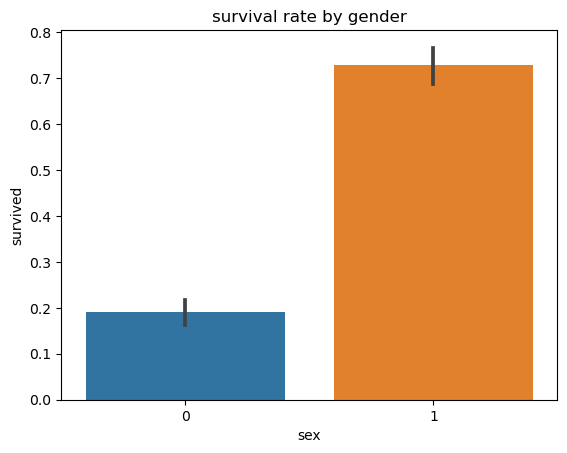

In [86]:
sns.barplot(x='sex',y='survived',data=df)
plt.title('survival rate by gender')
plt.show()

# barchat plot showing survival rate by passengers class

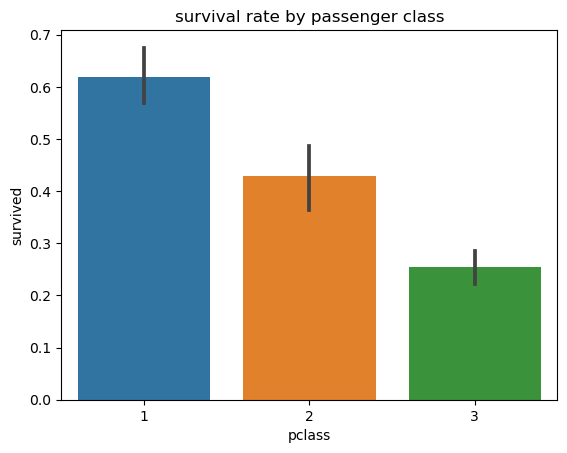

In [13]:
sns.barplot(x='pclass',y='survived',data=df)
plt.title('survival rate by passenger class')
plt.show()

# convert categorical features to numerical

In [14]:
df['sex']=df['sex'].map({'male':0,'female':1})

# converting embark to numerical values

In [15]:
df['embarked']=df['embarked'].map({'S':0,'C':1,'Q':2})

# data for machine learning

In [69]:
X=df[['pclass','sex','age','fare','embarked']]
Y=df['survived']

# splitting the data into training and testing sets

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Trian a machine learning Model(logistic regression)

In [71]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

# codes to remove and fishout any columns with ? and drop or replace with 0

In [60]:
columns_with_question_mark=df.columns[df.apply(lambda col: col.astype(str).str.contains('\?',na=False)).any()].tolist()
print("Columns containing '?':",columns_with_question_mark)

Columns containing '?': []


In [51]:
df=df.drop(columns=['home.dest'])

In [57]:
df_cleaned=df[~df.isin(['?']).any(axis=1)]

In [67]:
df=df.fillna(0)

# prediction

In [77]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
accuracy_df=pd.DataFrame({'Model Accuracy':[accuracy*100]})
accuracy_df

,Model Accuracy
0,77.099237


In [79]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1
 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 1 0 1]


# prediction comparison with the actual survival

In [82]:
comparison_df=pd.DataFrame({'Actual': Y_test,'predicted':y_pred})
print(comparison_df.head(50))

      Actual  predicted
1148       0          0
1049       1          0
982        0          0
808        0          0
1195       0          0
240        1          0
1118       0          0
596        1          0
924        0          0
65         1          1
1176       0          0
1186       0          0
1057       1          1
879        0          0
996        0          0
1077       1          1
1164       0          0
1061       1          1
308        1          1
764        0          0
1227       0          1
51         0          0
850        0          0
261        1          0
953        1          0
679        0          1
429        0          0
371        1          1
1040       1          1
192        1          1
538        1          0
427        1          0
1002       1          1
63         1          1
390        0          0
1271       0          0
208        1          1
409        0          0
76         1          1
184        0          0
536        1    

# calculating the accuracy of the prediction


In [85]:
accuracy=accuracy_score(Y_test,y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 77.10%


# conclusion

In [ ]:
The analysis provides insights into survival patterns on the Titanic and evaluate the logistic regression models ablility to predict survival 
based on historical data